In [11]:
import sys

# go out by one level of directory
sys.path.append("..")

# Introduction

## Problem Statement

# Machine Learning Pipeline

## Step 1: Exploratory Data Analysis

The first step in the pipeline is to perform exploratory data analysis (EDA) to understand the dataset better. This includes checking for missing values, data types, and statistical summaries of the features. Visualizations such as histograms, box plots, and correlation matrices are used to gain insights into the data.

### Project Setup

Before starting the EDA, we need to configure the project by defining the necessary constants and importing the required libraries.

#### File and Directory Paths

The following constants define the file and directory paths used in the project.

In [12]:
# Set global directories
DATA_DIR = "../data"
DATASET_DIR = f"{DATA_DIR}/datasets"

CACHE_DIR = f"{DATA_DIR}/cache"
DATASET_CACHE_DIR = f"{CACHE_DIR}/datasets"

TRAIN_DATA_DIR = f"{DATASET_DIR}/raw"
CLEANED_TRAIN_DATA_DIR = f"{DATASET_DIR}/cleaned"
PROCESSED_TRAIN_DATA_DIR = f"{DATASET_DIR}/processed"

# Set path to cache visualizations and models
VISUALIZATION_DIR = f"{CACHE_DIR}/visualizations"
MODEL_DIR = f"{CACHE_DIR}/models"

#### Reload custom libraries

Some libraries purposely custom-built by me to be used in this notebook. Making modifications to these libraries will require reloading them. The following code block automates the process of reloading the libraries without restarting the kernel.

In [13]:
from utils.cache import reload_custom_libraries

reload_custom_libraries()

# Import necessary packages and libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from PIL import ImageFile
import os, sys
from tqdm.auto import tqdm


# Load personalize utils
import utils.image_process as image_process

# Get a general view of the dataset

In [15]:
data = tf.keras.utils.image_dataset_from_directory(TRAIN_DATA_DIR)

Found 113216 files belonging to 6 classes.


# Extract image paths into different categories base on its type

In [16]:
# extracting paths from each of the category
beds_path = image_process.image_path(TRAIN_DATA_DIR, "beds")
chairs_path = image_process.image_path(TRAIN_DATA_DIR, "chairs")
dressers_path = image_process.image_path(TRAIN_DATA_DIR, "dressers")
lamps_path = image_process.image_path(TRAIN_DATA_DIR, "lamps")
sofas_path = image_process.image_path(TRAIN_DATA_DIR, "sofas")
tables_path = image_process.image_path(TRAIN_DATA_DIR, "tables")

print("Successfully extract all paths!")

Getting path: 100%|██████████| 17/17 [00:00<00:00, 1698.42it/s]

Successfully extract all paths!


# EDA

## Get the total amount of images in different categories before checking for duplicants

In [17]:
print("Amount of bed: ", len(beds_path))
print("Amount of chair: ", len(chairs_path))
print("Amount of dresser: ", len(dressers_path))
print("Amount of lamp: ", len(lamps_path))
print("Amount of sofa: ", len(sofas_path))
print("Amount of table: ", len(tables_path))
print(
    "Total: ",
    len(beds_path)
    + len(chairs_path)
    + len(dressers_path)
    + len(lamps_path)
    + len(sofas_path)
    + len(tables_path),
)

Amount of bed:  19948
Amount of chair:  31733
Amount of dresser:  7892
Amount of lamp:  32422
Amount of sofa:  4101
Amount of table:  17121
Total:  113217


### Visualization

In [18]:
image_Classes = {
    "Beds": len(beds_path),
    "Chairs": len(chairs_path),
    "Dressers": len(dressers_path),
    "Sofas": len(sofas_path),
    "Lamps": len(lamps_path),
    "Tables": len(tables_path),
}

Text(0, 0.5, 'Amount')

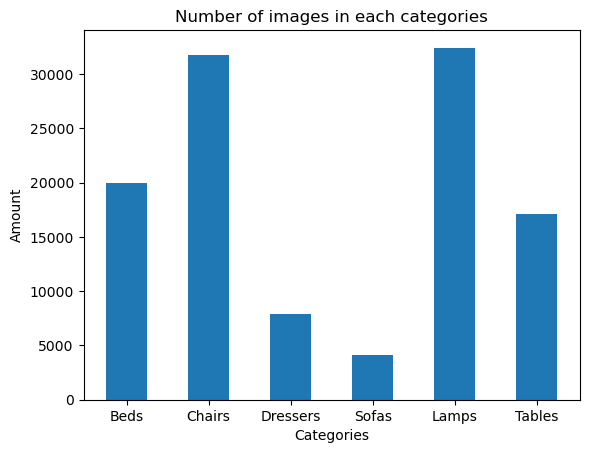

In [19]:
plt.bar(image_Classes.keys(), image_Classes.values(), width=0.5)
plt.title("Number of images in each categories")
plt.xlabel("Categories")
plt.ylabel("Amount")

## Get different amount of image size of each category

In [20]:
print("Beds")
df_bed_dims = pd.DataFrame(imgSizeList(beds_path), columns=["width", "height"])
print("Chairs")
df_chair_dims = pd.DataFrame(imgSizeList(chairs_path), columns=["width", "height"])
print("Dressers")
df_dresser_dims = pd.DataFrame(imgSizeList(dressers_path), columns=["width", "height"])
print("Lamps")
df_lamp_dims = pd.DataFrame(imgSizeList(lamps_path), columns=["width", "height"])
print("sofas")
df_sofa_dims = pd.DataFrame(imgSizeList(sofas_path), columns=["width", "height"])
print("Tables")
df_table_dims = pd.DataFrame(imgSizeList(tables_path), columns=["width", "height"])

Beds


NameError: name 'imgSizeList' is not defined

### Visualization

#### Visualization of each dataset

<Axes: xlabel='width', ylabel='height'>

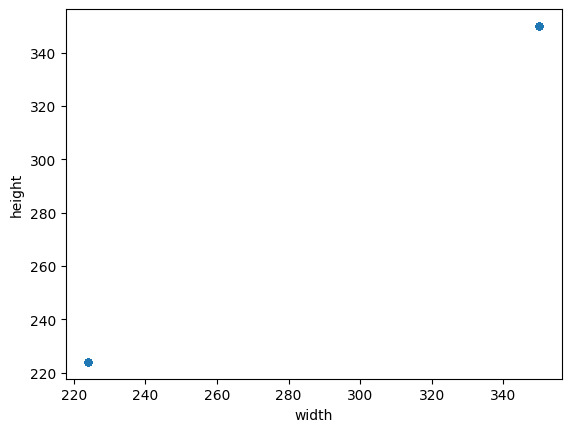

In [ ]:
df_bed_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

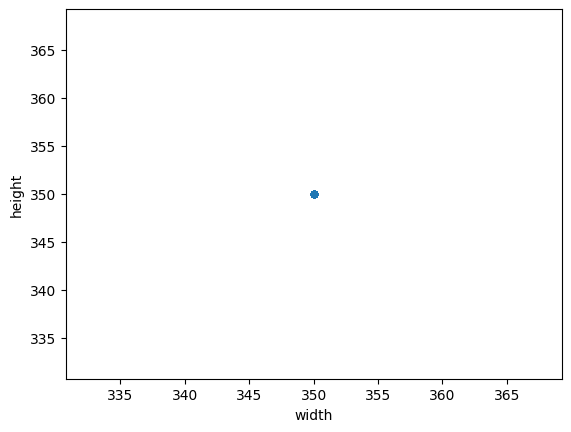

In [ ]:
df_chair_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

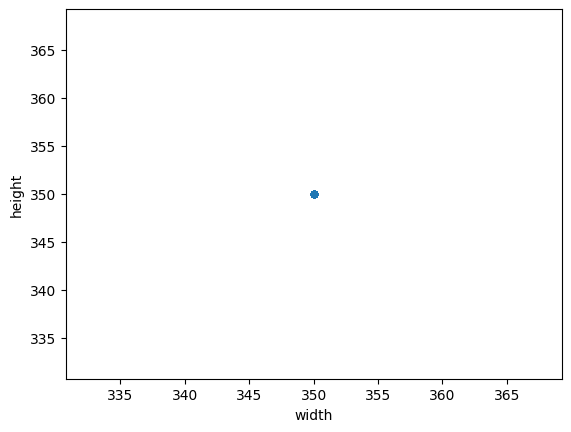

In [ ]:
df_dresser_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

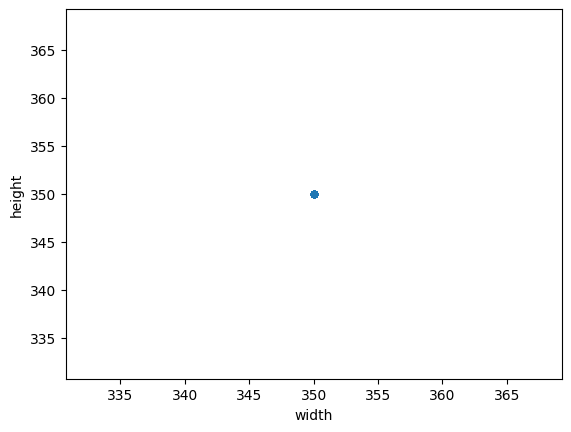

In [ ]:
df_lamp_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

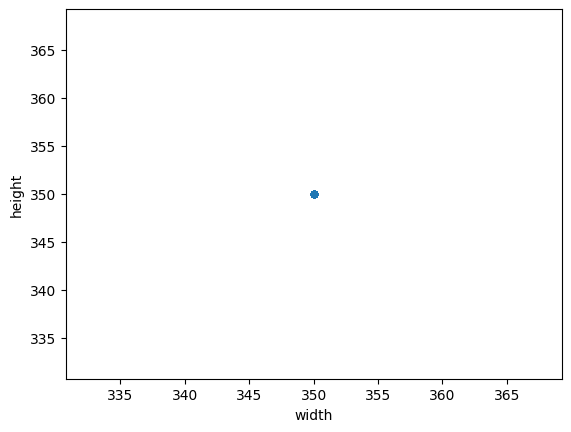

In [ ]:
df_sofa_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

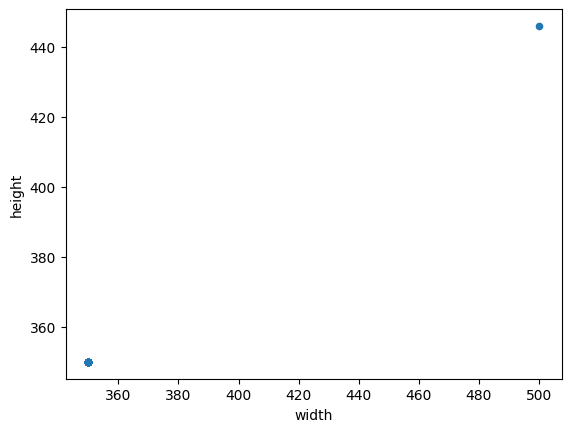

In [ ]:
df_table_dims.plot.scatter(x="width", y="height")

Investigate anomaly data in the dataframe

In [ ]:
df_table_dims.describe().T

,count,mean,std,min,25%,50%,75%,max
width,17100.0,350.008772,1.147079,350.0,350.0,350.0,350.0,500.0
height,17100.0,350.005614,0.734130,350.0,350.0,350.0,350.0,446.0


## Conclusion

- The dataset contains 6 categories of items with 90083 items total
- The dataset contains all file with JPEG type
- The dataset contains image mainly in two dimensions: 224x224 and 350x350. However there are one anomaly dimensions in the table category which is: 500x446

# Data Preprocessing

## Data cleaning

Getting length of all path in raw dataset

In [21]:
print(len(beds_path))
print(len(chairs_path))
print(len(dressers_path))
print(len(lamps_path))
print(len(sofas_path))
print(len(tables_path))

19948
31733
7892
32422
4101
17121


Check the size in each categories

In [24]:
image_process.imgSizeList(beds_path)
image_process.imgSizeList(chairs_path)
image_process.imgSizeList(dressers_path)
image_process.imgSizeList(lamps_path)
image_process.imgSizeList(sofas_path)
image_process.imgSizeList(tables_path)

Getting image size: 100%|██████████| 19948/19948 [00:18<00:00, 1053.45it/s]


224x224 pixels:  6537
350x350 pixels:  13411
Other size:  0


Getting image size: 100%|██████████| 31733/31733 [00:48<00:00, 657.28it/s] 


224x224 pixels:  0
350x350 pixels:  31733
Other size:  0


Getting image size: 100%|██████████| 7892/7892 [00:16<00:00, 484.72it/s]


224x224 pixels:  0
350x350 pixels:  7892
Other size:  0


Getting image size: 100%|██████████| 32422/32422 [01:10<00:00, 461.16it/s]


224x224 pixels:  0
350x350 pixels:  32422
Other size:  0


Getting image size: 100%|██████████| 4101/4101 [00:09<00:00, 454.01it/s]


224x224 pixels:  0
350x350 pixels:  4101
Other size:  0


Getting image size: 100%|██████████| 17121/17121 [00:37<00:00, 454.70it/s]

224x224 pixels:  0
350x350 pixels:  17120
Other size:  1


[(350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),

As the size in each categories still contains different image sizes of 224x224, 350x350 and one outliers at 500x446.
We will start with resizing all images to 350x350. Here are some reasons:
- The vast majority of the images are already at 350x350. Upscaling the smaller images will introduce minimal distortion compared to downscaling the majority to 224x224.
- Upscaling generally retains more information from the original image than downscaling. While some interpolation artifacts might be introduced, they are less likely to significantly impact model performance compared to the information loss from downscaling.
- The single image with a size of 500x448 is an outlier. which we can either upscale it to match the majority or exclude it from our dataset without significant impact.

### Image resizing

In [25]:
size = (350,350)
save_path = CLEANED_TRAIN_DATA_DIR
image_process.imgResize(beds_path, size, save_path)
image_process.imgResize(chairs_path, size, save_path)
image_process.imgResize(dressers_path, size, save_path)
image_process.imgResize(lamps_path, size, save_path)
image_process.imgResize(sofas_path, size, save_path)
image_process.imgResize(tables_path, size, save_path)

Resizing images:  26%|██▌       | 5144/19948 [00:24<01:09, 213.28it/s]


KeyboardInterrupt: 

### Getting path from cleaned dataset

In [ ]:
cleaned_dir = CLEANED_TRAIN_DATA_DIR
cleaned_beds_path = image_process.image_path(cleaned_dir, "beds")
cleaned_chairs_path = image_process.image_path(cleaned_dir, "chairs")
cleaned_dressers_path = image_process.image_path(cleaned_dir, "dressers")
cleaned_lamps_path = image_process.image_path(cleaned_dir, "lamps")
cleaned_sofas_path = image_process.image_path(cleaned_dir, "sofas")
cleaned_tables_path = image_process.image_path(cleaned_dir, "tables")

### Checking for duplicates

In [ ]:
image_process.imgDupchecks(beds_path)
image_process.imgDupchecks(chairs_path)
image_process.imgDupchecks(dressers_path)
image_process.imgDupchecks(lamps_path)
image_process.imgDupchecks(sofas_path)
image_process.imgDupchecks(tables_path)

### Data Augmentation

This is a time-consuming task, be aware that it will take a long time to run

In [ ]:
save_dir = PROCESSED_TRAIN_DATA_DIR
image_process.img_augment(cleaned_beds_path,save_dir )
image_process.img_augment(cleaned_chairs_path,save_dir)
image_process.img_augment(cleaned_dressers_path,save_dir)
image_process.img_augment(cleaned_lamps_path,save_dir)
image_process.img_augment(cleaned_sofas_path,save_dir)
image_process.img_augment(cleaned_tables_path,save_dir)

After all of the above step, the data would ready to be input to the model, the data which can be use will be available in the .data/dataset/processed 